In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
from datetime import datetime

In [4]:
posts = pd.read_csv('posts.csv')

In [5]:
posts['posted_at_timestamp'] = posts['posted_at'].apply(lambda x: pd.Timestamp(x))

In [6]:
posts['posted_at_timestamp'] = posts.posted_at_timestamp.astype('int64') // 10**9

In [7]:
posts.head()

,id,title,body,url,reddit_id,comments_count,posted_at,author_id,created_at,updated_at,score,upvoted,short_url,subreddit_id,posted_at_timestamp
0,1,[UPDATE] I (29F) keep finding long hairs in my...,https://www.reddit.com/r/relationship_advice/c...,/r/relationship_advice/comments/hu3e0a/update_...,t3_hu3e0a,3476,2020-07-19 16:36:08 UTC,1.0,2021-03-22 14:23:10 UTC,2021-04-18 21:28:54 UTC,131695,95,https://redd.it/hu3e0a,1,1595176568
1,2,Update: My (32F) husband (36M) became a robot ...,"original:\n\nHey everybody, here’s the update....",/r/relationship_advice/comments/hmzvgt/update_...,t3_hmzvgt,3952,2020-07-07 18:15:40 UTC,2.0,2021-03-22 14:23:22 UTC,2021-04-18 19:15:01 UTC,116584,94,https://redd.it/hmzvgt,1,1594145740
2,3,UPDATE: My girlfriend told me she was with a f...,Original post: https://www.reddit.com/r/relati...,/r/relationship_advice/comments/hjkgnj/update_...,t3_hjkgnj,5678,2020-07-01 22:17:55 UTC,3.0,2021-03-22 14:23:35 UTC,2021-04-18 16:12:08 UTC,116038,94,https://redd.it/hjkgnj,1,1593641875
3,4,"UPDATE: my son and his ""friend"" are a couple. ...",I tried yo post this before but it got removed...,/r/relationship_advice/comments/fwog3j/update_...,t3_fwog3j,2510,2020-04-07 17:18:31 UTC,4.0,2021-03-22 14:23:48 UTC,2021-04-18 00:25:25 UTC,91942,90,https://redd.it/fwog3j,1,1586279911
4,5,yesterday I froze during sex and my girlfriend...,I am 23(M) and I've been raped before. Twice. ...,/r/relationship_advice/comments/j1ur51/yesterd...,t3_j1ur51,2448,2020-09-29 07:42:36 UTC,5.0,2021-03-22 14:24:32 UTC,2021-04-18 17:35:16 UTC,74681,87,https://redd.it/j1ur51,1,1601365356


In [9]:
posts.astype

array([1, 2, 9], dtype=int64)

In [10]:
posts.describe()

,id,comments_count,author_id,score,upvoted,subreddit_id,posted_at_timestamp
count,152712.000000,152712.000000,141864.000000,152712.000000,152712.000000,152712.000000,1.527120e+05
mean,85229.213958,46.798202,71855.768877,149.830452,76.242208,1.602998,1.462100e+09
std,44556.723376,146.943634,38179.366540,1377.184673,18.336926,0.550636,9.126570e+07
min,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.246429e+09
25%,47323.750000,10.000000,39266.000000,1.000000,67.000000,1.000000,1.391366e+09
50%,85501.500000,21.000000,72088.500000,6.000000,80.000000,2.000000,1.453686e+09
75%,123679.250000,43.000000,104525.250000,39.000000,91.000000,2.000000,1.538863e+09
max,161857.000000,15528.000000,138350.000000,131695.000000,100.000000,9.000000,1.618330e+09


In [8]:
pd.to_datetime(1595176568, unit='s')

Timestamp('2020-07-19 16:36:08')

In [11]:
posts['space_count'] = posts.body.str.count("\n")

In [12]:
posts['update'] = posts.title.str.count("UPDATE")

In [13]:
posts['update1'] = posts.title.str.count("Update")

In [14]:
posts.eval('UPDATE = update + update1', inplace=True)

In [15]:
posts = posts.drop(['update', 'update1'], axis=1)

In [17]:
posts.head()

,id,title,body,url,reddit_id,comments_count,posted_at,author_id,created_at,updated_at,score,upvoted,short_url,subreddit_id,posted_at_timestamp,space_count,UPDATE
0,1,[UPDATE] I (29F) keep finding long hairs in my...,https://www.reddit.com/r/relationship_advice/c...,/r/relationship_advice/comments/hu3e0a/update_...,t3_hu3e0a,3476,2020-07-19 16:36:08 UTC,1.0,2021-03-22 14:23:10 UTC,2021-04-18 21:28:54 UTC,131695,95,https://redd.it/hu3e0a,1,1595176568,25,1
1,2,Update: My (32F) husband (36M) became a robot ...,"original:\n\nHey everybody, here’s the update....",/r/relationship_advice/comments/hmzvgt/update_...,t3_hmzvgt,3952,2020-07-07 18:15:40 UTC,2.0,2021-03-22 14:23:22 UTC,2021-04-18 19:15:01 UTC,116584,94,https://redd.it/hmzvgt,1,1594145740,59,1
2,3,UPDATE: My girlfriend told me she was with a f...,Original post: https://www.reddit.com/r/relati...,/r/relationship_advice/comments/hjkgnj/update_...,t3_hjkgnj,5678,2020-07-01 22:17:55 UTC,3.0,2021-03-22 14:23:35 UTC,2021-04-18 16:12:08 UTC,116038,94,https://redd.it/hjkgnj,1,1593641875,28,1
3,4,"UPDATE: my son and his ""friend"" are a couple. ...",I tried yo post this before but it got removed...,/r/relationship_advice/comments/fwog3j/update_...,t3_fwog3j,2510,2020-04-07 17:18:31 UTC,4.0,2021-03-22 14:23:48 UTC,2021-04-18 00:25:25 UTC,91942,90,https://redd.it/fwog3j,1,1586279911,11,1
4,5,yesterday I froze during sex and my girlfriend...,I am 23(M) and I've been raped before. Twice. ...,/r/relationship_advice/comments/j1ur51/yesterd...,t3_j1ur51,2448,2020-09-29 07:42:36 UTC,5.0,2021-03-22 14:24:32 UTC,2021-04-18 17:35:16 UTC,74681,87,https://redd.it/j1ur51,1,1601365356,21,0


In [64]:
posts_data = posts.drop(['id', 'title', 'body', 'url', 'posted_at', 'created_at', 'updated_at', 'short_url', 'reddit_id', 'subreddit_id'], axis=1)

In [95]:
posts_data['author_id'] = posts_data['author_id'].apply(lambda id: int(id))

In [94]:
posts_data = posts_data.fillna(0)

In [23]:
posts_data.subreddit_id.unique()

array([1, 2, 9], dtype=int64)

In [67]:
authors = pd.read_csv('authors.csv')

In [68]:
authors.shape

(130581, 8)

In [31]:
authors.head()

,id,name,reddit_id,post_karma,comment_karma,created_at,updated_at,registered_at
0,1,throwra_advice12,t2_79xpr303,12,239,2021-03-22 14:23:10 UTC,2021-03-22 14:23:10 UTC,2020-07-15
1,2,throwRA-193837472772,t2_73maproz,14,3,2021-03-22 14:23:22 UTC,2021-03-22 14:23:22 UTC,2020-06-30
2,3,throwra_wheredshego,t2_71yk0v7q,17,5,2021-03-22 14:23:35 UTC,2021-03-22 14:23:35 UTC,2020-06-30
3,4,throwralovemygayson,t2_64kd02pf,20,18,2021-03-22 14:23:47 UTC,2021-03-22 14:23:47 UTC,2020-04-05
4,5,throwrasurprisegf,t2_89y81ddw,15,0,2021-03-22 14:24:31 UTC,2021-03-22 14:24:31 UTC,2020-09-29


In [69]:
authors_data = authors.drop(['name', 'created_at', 'updated_at', 'registered_at', 'reddit_id'], axis=1)

In [86]:
posts_data.fillna({'author_id': 0.0})

,comments_count,author_id,score,upvoted,posted_at_timestamp,space_count,UPDATE
0,3476,1.0,131695,95,1595176568,25,1
1,3952,2.0,116584,94,1594145740,59,1
2,5678,3.0,116038,94,1593641875,28,1
3,2510,4.0,91942,90,1586279911,11,1
4,2448,5.0,74681,87,1601365356,21,0
...,...,...,...,...,...,...,...
152707,10,138346.0,50,90,1590436865,27,0
152708,19,138347.0,0,30,1514570310,11,0
152709,12,138348.0,2,100,1590380774,15,0
152710,11,138349.0,1,100,1590391327,11,0


In [70]:
authors_data.head()

,id,post_karma,comment_karma
0,1,12,239
1,2,14,3
2,3,17,5
3,4,20,18
4,5,15,0


In [98]:
posts_data = posts_data.rename(columns={'author_id': 'id'})

In [103]:
merged_data = pd.merge(posts_data, authors_data, on='id')


In [104]:
merged_data

,comments_count,id,score,upvoted,posted_at_timestamp,space_count,UPDATE,post_karma,comment_karma
0,3476,1,131695,95,1595176568,25,1,12,239
1,3952,2,116584,94,1594145740,59,1,14,3
2,1822,2,27574,98,1593924112,33,0,14,3
3,5678,3,116038,94,1593641875,28,1,17,5
4,10093,3,48414,94,1593465966,21,0,17,5
...,...,...,...,...,...,...,...,...,...
141859,10,138346,50,90,1590436865,27,0,35,1
141860,19,138347,0,30,1514570310,11,0,1,-6
141861,12,138348,2,100,1590380774,15,0,3,6
141862,11,138349,1,100,1590391327,11,0,48,36


In [106]:
merged_data_x = merged_data.drop(['id', 'score'], axis=1)
merged_data_y = merged_data.score

In [15]:
posts_data['date'] = pd.to_datetime(posts_data.posted_at_timestamp, unit='s')

In [107]:
from sklearn.ensemble import RandomForestClassifier

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(merged_data_x, merged_data_y, test_size = 0.30, random_state = 42)

In [109]:
clf_rf = RandomForestClassifier()

In [110]:
from sklearn import tree
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
%matplotlib inline

In [115]:
parametrs = {'n_estimators':  [10, 20, 30], 'max_depth': [5, 7, 10]}

In [116]:
grid_clf_rf = GridSearchCV(clf_rf, param_grid=parametrs, cv=5)

In [117]:
grid_clf_rf.fit(X_train, y_train)

C:\Users\Tim\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 7, 10], 'n_estimators': [10, 20, 30]})

In [24]:
grid_clf_rf.best_params_

{'max_depth': 10, 'n_estimators': 30}

In [25]:
best_grid_clf_rf = grid_clf_rf.best_estimator_

In [26]:
best_grid_clf_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=30)

In [27]:
feature_importances = best_grid_clf_rf.feature_importances_

In [28]:
feature_importances_df = pd.DataFrame({'features': list(X_train),
                                      'feature_importances': feature_importances})

<AxesSubplot:>

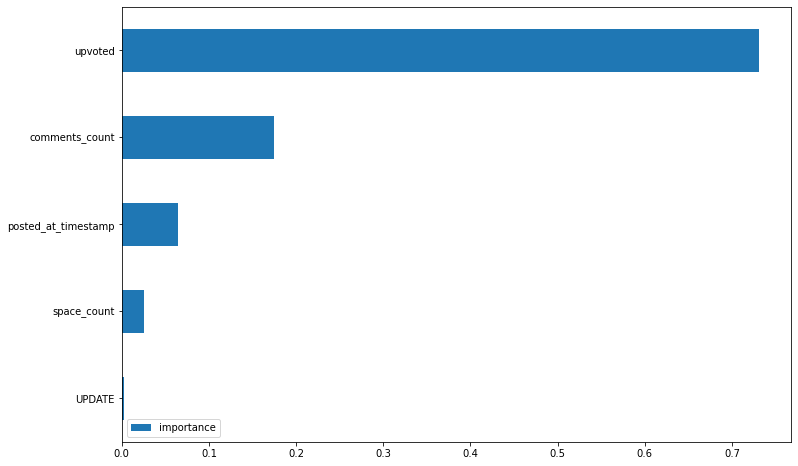

In [29]:
imp = pd.DataFrame(best_grid_clf_rf.feature_importances_, index=posts_data_x.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [30]:
imp

,importance
comments_count,0.175129
upvoted,0.731383
posted_at_timestamp,0.064833
space_count,0.025475
UPDATE,0.003180


In [33]:
relationship_advice_x = relationship_advice.drop(['score', 'subreddit_id', 'date'], axis=1)
relationship_advice_y = relationship_advice.score

In [ ]:
grid_clf_rf.fit(relationship_advice_x, relationship_advice_x)

In [ ]:
grid_clf_rf.best_params_

In [ ]:
best_grid_clf_rf = grid_clf_rf.best_estimator_

In [ ]:
best_grid_clf_rf.fit(relationship_advice_x, relationship_advice_x)

In [ ]:
feature_importances = best_grid_clf_rf.feature_importances_

In [ ]:
feature_importances_df_1 = pd.DataFrame({'features': list(relationship_advice_x),
                                      'feature_importances': feature_importances})

In [ ]:
imp = pd.DataFrame(best_grid_clf_rf.feature_importances_, index=relationship_advice_x.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

<AxesSubplot:xlabel='posted_at_timestamp'>

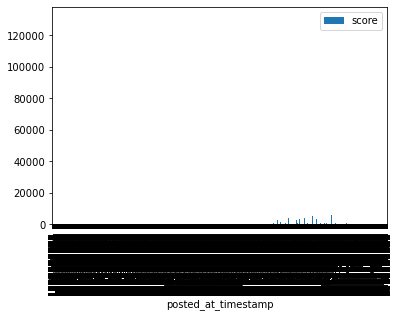

In [18]:
date, score = 'posted_at_timestamp', 'score'
posts_data[[date, score]].groupby(date, as_index=False).mean().plot.bar(date, score)

<AxesSubplot:xlabel='date', ylabel='Density'>

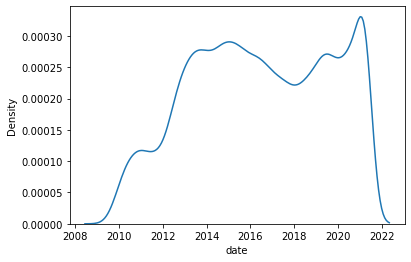

In [26]:
sns.kdeplot(data=relationship_advice, x='date')

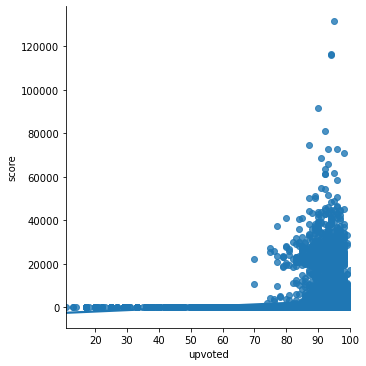

In [63]:
sns.lmplot(x='upvoted', y='score', data=posts)

<AxesSubplot:xlabel='upvoted', ylabel='score'>

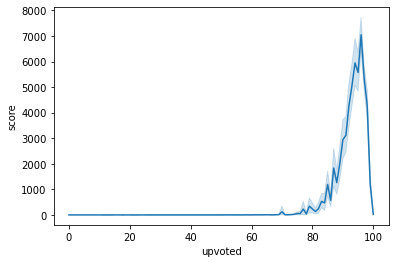

In [32]:
sns.lineplot(x=posts.upvoted, y=posts.score)

<AxesSubplot:xlabel='upvoted', ylabel='comments_count'>

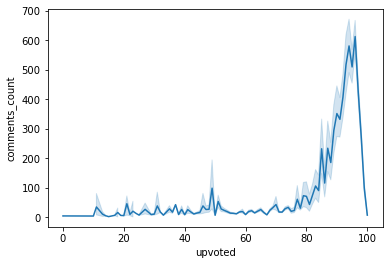

In [33]:
sns.lineplot(x=posts.upvoted, y=posts.comments_count)

<AxesSubplot:xlabel='comments_count', ylabel='score'>

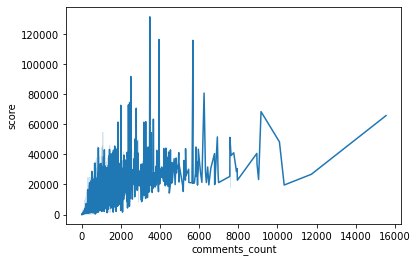

In [39]:
sns.lineplot(x=posts.comments_count, y=posts.score)

<AxesSubplot:xlabel='comments_count', ylabel='Density'>

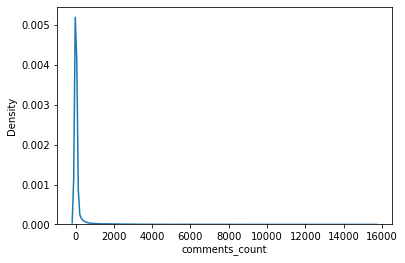

In [34]:
sns.kdeplot(data=posts_data, x='comments_count')

<AxesSubplot:xlabel='score', ylabel='Density'>

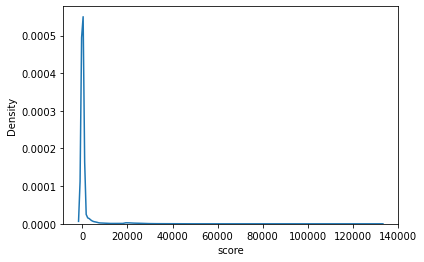

In [35]:
sns.kdeplot(data=posts_data, x='score')

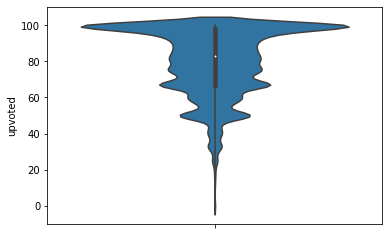

In [36]:
ax = sns.violinplot(y=posts_data['upvoted'])

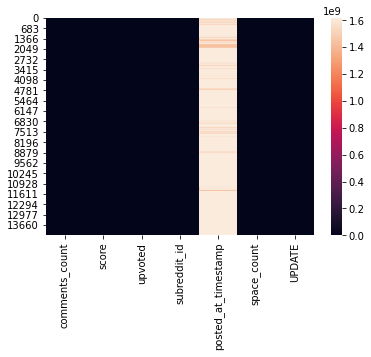

In [21]:
g = sns.heatmap(posts_data)

C:\Users\Tim\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Tim\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Tim\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Tim\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


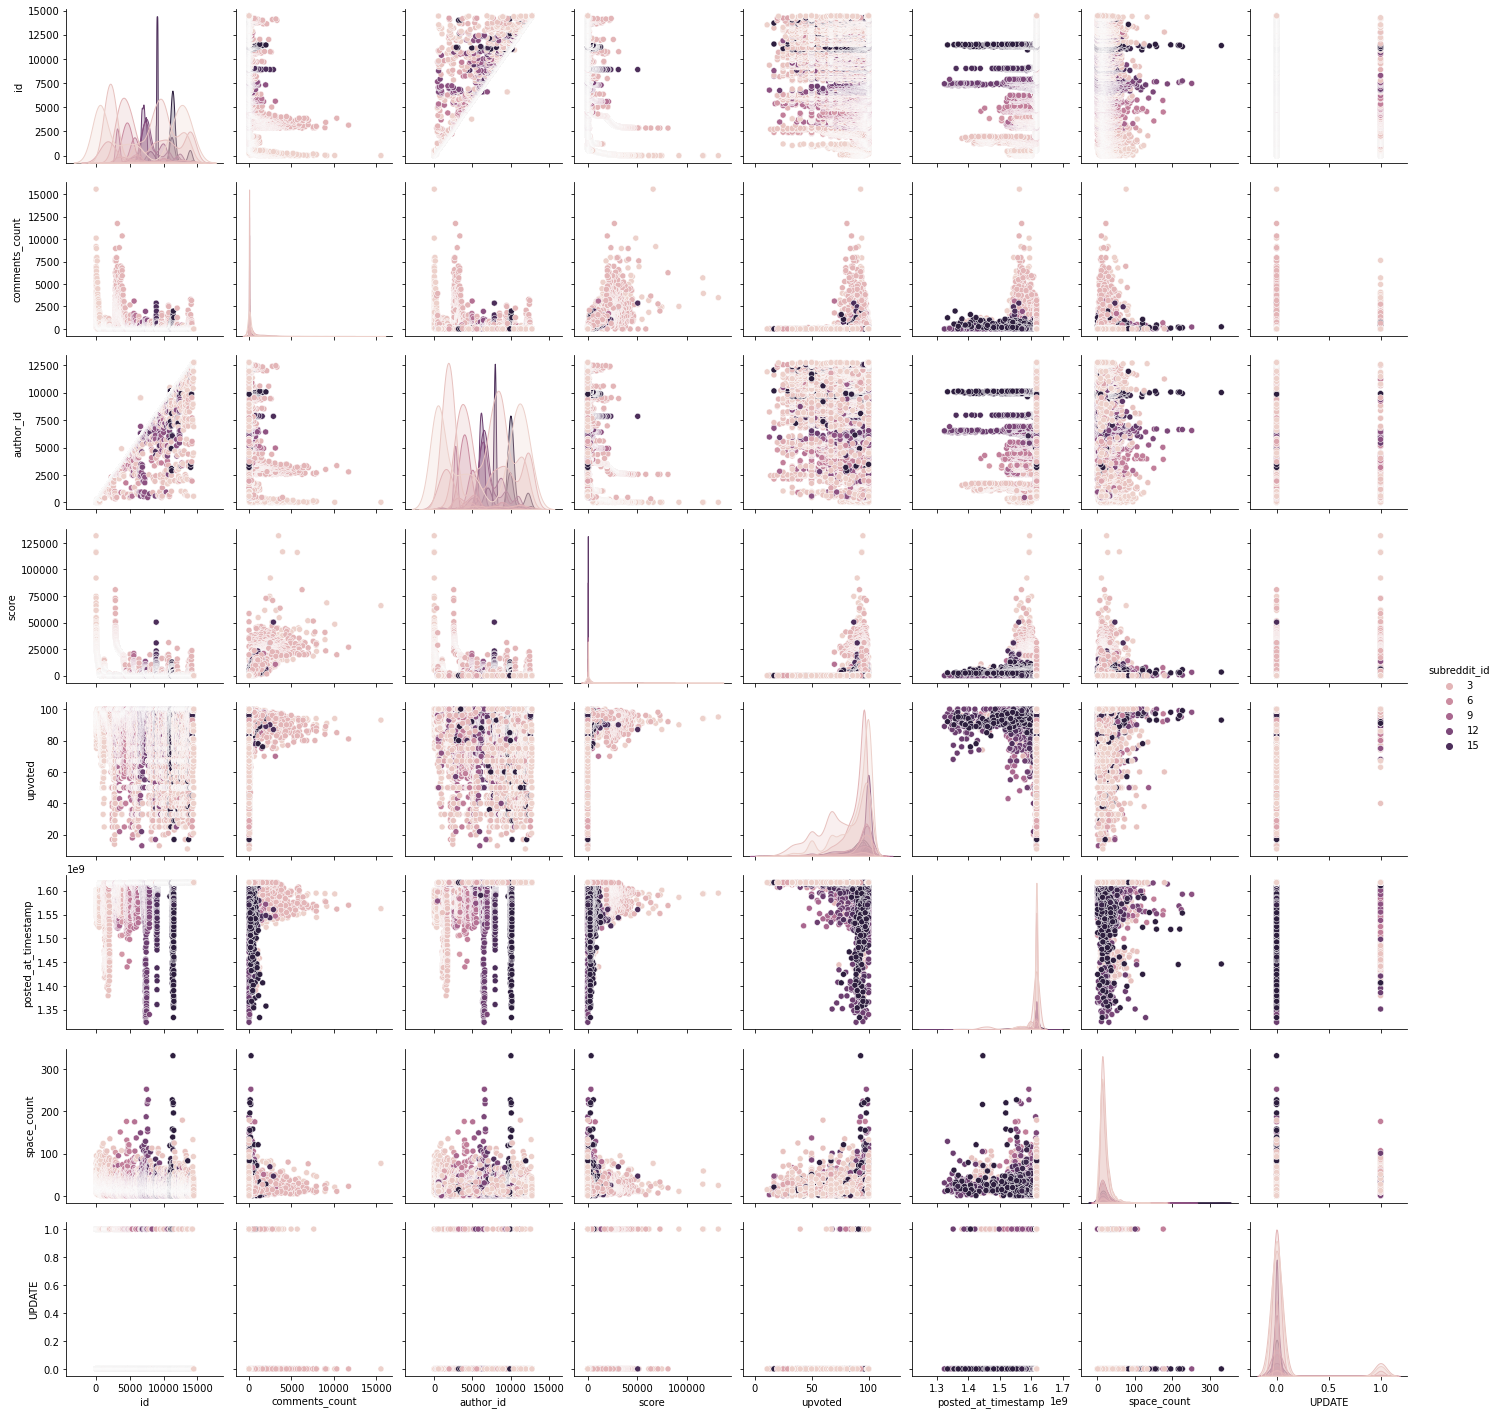

In [23]:
sns.pairplot(posts, hue='subreddit_id')

<AxesSubplot:xlabel='upvoted', ylabel='score'>

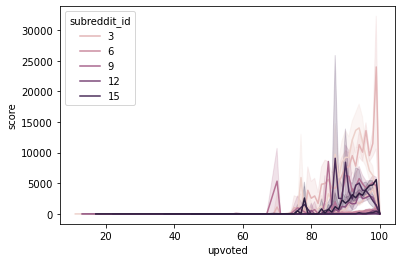

In [37]:
sns.lineplot(x='upvoted', y='score', hue='subreddit_id',sizes=(.25, 2.5), data=posts)

In [85]:
special_words = ['sex', 'drugs', 'abuse', 'virgin', 'breakup', 'break-up', 'harassment', 'rap', 'gay', 'care', 'date']

In [83]:
body = posts.body

In [84]:
body.head()

0    https://www.reddit.com/r/relationship_advice/c...
1    original:\n\nHey everybody, here’s the update....
2    Original post: https://www.reddit.com/r/relati...
3    I tried yo post this before but it got removed...
4    I am 23(M) and I've been raped before. Twice. ...
Name: body, dtype: object

In [91]:
def countWords(data_frame, selected_words):
    words_dict = {}

    for sentence in data_frame:
        remove = string.punctuation
        remove = remove.replace("'", "") # don't remove hyphens
        pattern = r"[{}]".format(remove) # create the pattern

        test = re.sub(pattern, "", str(sentence)) #compile

        splited_words = str(test).split(' ')

        for word in splited_words:
            word = word.strip()
            word = word.lower()

In [92]:
countWords(body, special_words)

NameError: name 'string' is not defined

In [9]:
relationship_advice = posts[posts.subreddit_id == 1]

In [7]:
subreddits = pd.read_csv('subreddits.csv')

In [20]:
subreddits.sort_values(['subscribers_count'], ascending = False)

,id,name,subscribers_count,founded_at,created_at,updated_at
0,1,relationship_advice,4911213,2009-06-14 23:12:59 UTC,2021-03-23 13:02:54 UTC,2021-03-23 13:02:54 UTC
1,2,relationships,3046414,2008-07-09 22:26:26 UTC,2021-03-23 13:03:02 UTC,2021-03-23 13:03:02 UTC
2,3,AmItheAsshole,2630676,2013-06-08 20:14:50 UTC,2021-03-23 13:03:09 UTC,2021-03-23 13:03:09 UTC
10,11,dating_advice,2575182,2010-09-27 19:54:51 UTC,2021-03-24 16:46:18 UTC,2021-03-25 10:28:32 UTC
14,15,confession,2440633,2008-11-02 15:31:03 UTC,2021-03-26 23:24:10 UTC,2021-03-26 23:24:10 UTC
16,17,sex,1835296,2008-01-25 06:51:50 UTC,2021-03-30 16:09:21 UTC,2021-03-30 16:09:21 UTC
7,8,confessions,798118,2008-12-19 20:11:03 UTC,2021-03-23 13:03:42 UTC,2021-03-23 13:03:42 UTC
9,10,LongDistance,337945,2010-11-11 16:18:27 UTC,2021-03-23 13:03:57 UTC,2021-03-23 13:03:57 UTC
6,7,DeadBedrooms,301691,2011-11-03 18:09:18 UTC,2021-03-23 13:03:35 UTC,2021-03-23 13:03:35 UTC
3,4,askwomenadvice,251182,2014-02-26 04:44:45 UTC,2021-03-23 13:03:18 UTC,2021-03-23 13:03:18 UTC


In [15]:
authors = pd.read_csv('authors.csv')

In [16]:
authors.head()

,id,name,reddit_id,post_karma,comment_karma,created_at,updated_at,registered_at
0,1,throwra_advice12,t2_79xpr303,12,239,2021-03-22 14:23:10 UTC,2021-03-22 14:23:10 UTC,2020-07-15
1,2,throwRA-193837472772,t2_73maproz,14,3,2021-03-22 14:23:22 UTC,2021-03-22 14:23:22 UTC,2020-06-30
2,3,throwra_wheredshego,t2_71yk0v7q,17,5,2021-03-22 14:23:35 UTC,2021-03-22 14:23:35 UTC,2020-06-30
3,4,throwralovemygayson,t2_64kd02pf,20,18,2021-03-22 14:23:47 UTC,2021-03-22 14:23:47 UTC,2020-04-05
4,5,throwrasurprisegf,t2_89y81ddw,15,0,2021-03-22 14:24:31 UTC,2021-03-22 14:24:31 UTC,2020-09-29


In [69]:
number_of_words = []

In [70]:
for w in example:
    number_of_words.append(example.count(w))

In [72]:
print("Pairs\n" + str(list(zip(example, number_of_words))))

Pairs
[('First', 1), ('of', 8), ('all,', 2), ('I', 21), ('just', 2), ('want', 1), ('to', 16), ('thank', 1), ('everyone', 1), ('here', 1), ('for', 5), ('the', 8), ('support', 1), ('I', 21), ('received', 1), ('following', 1), ('my', 9), ('first', 1), ('post', 1), ('back', 1), ('in', 4), ('August.', 1), ('At', 2), ('the', 8), ('time,', 1), ('it', 3), ('truly', 1), ('felt', 1), ('like', 3), ('my', 9), ('world', 1), ('was', 4), ('ending.', 1), ('It', 3), ('was', 4), ('important', 1), ('to', 16), ('me', 6), ('to', 16), ('make', 2), ('this', 3), ('update', 1), ('because', 1), ('I', 21), ('need', 1), ('to', 16), ('tell', 1), ('anyone', 1), ('who’s', 1), ('currently', 1), ('going', 1), ('through', 1), ('the', 8), ('same', 2), ('thing—IT', 1), ('GETS', 1), ('BETTER.', 1), ('You', 1), ('will', 1), ('get', 4), ('so', 10), ('much', 4), ('better.', 2), ('I', 21), ('had', 2), ('one', 1), ('conversation', 1), ('with', 3), ('my', 9), ('husband', 1), ('since', 1), ('everything', 1), ('happened—by', 1), 

In [73]:
words = str(list(zip(example, number_of_words)))

In [74]:
stopwords = ['a', 'about', 'above', 'across', 'after', 'afterwards']
stopwords += ['again', 'against', 'all', 'almost', 'alone', 'along']
stopwords += ['already', 'also', 'although', 'always', 'am', 'among']
stopwords += ['amongst', 'amoungst', 'amount', 'an', 'and', 'another']
stopwords += ['any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere']
stopwords += ['are', 'around', 'as', 'at', 'back', 'be', 'became']
stopwords += ['because', 'become', 'becomes', 'becoming', 'been']
stopwords += ['before', 'beforehand', 'behind', 'being', 'below']
stopwords += ['beside', 'besides', 'between', 'beyond', 'bill', 'both']
stopwords += ['bottom', 'but', 'by', 'call', 'can', 'cannot', 'cant']
stopwords += ['co', 'computer', 'con', 'could', 'couldnt', 'cry', 'de']
stopwords += ['describe', 'detail', 'did', 'do', 'done', 'down', 'due']
stopwords += ['during', 'each', 'eg', 'eight', 'either', 'eleven', 'else']
stopwords += ['elsewhere', 'empty', 'enough', 'etc', 'even', 'ever']
stopwords += ['every', 'everyone', 'everything', 'everywhere', 'except']
stopwords += ['few', 'fifteen', 'fifty', 'fill', 'find', 'fire', 'first']
stopwords += ['five', 'for', 'former', 'formerly', 'forty', 'found']
stopwords += ['four', 'from', 'front', 'full', 'further', 'get', 'give']
stopwords += ['go', 'had', 'has', 'hasnt', 'have', 'he', 'hence', 'her']
stopwords += ['here', 'hereafter', 'hereby', 'herein', 'hereupon', 'hers']
stopwords += ['herself', 'him', 'himself', 'his', 'how', 'however']
stopwords += ['hundred', 'i', 'ie', 'if', 'in', 'inc', 'indeed']
stopwords += ['interest', 'into', 'is', 'it', 'its', 'itself', 'keep']
stopwords += ['last', 'latter', 'latterly', 'least', 'less', 'ltd', 'made']
stopwords += ['many', 'may', 'me', 'meanwhile', 'might', 'mill', 'mine']
stopwords += ['more', 'moreover', 'most', 'mostly', 'move', 'much']
stopwords += ['must', 'my', 'myself', 'name', 'namely', 'neither', 'never']
stopwords += ['nevertheless', 'next', 'nine', 'no', 'nobody', 'none']
stopwords += ['noone', 'nor', 'not', 'nothing', 'now', 'nowhere', 'of']
stopwords += ['off', 'often', 'on','once', 'one', 'only', 'onto', 'or']
stopwords += ['other', 'others', 'otherwise', 'our', 'ours', 'ourselves']
stopwords += ['out', 'over', 'own', 'part', 'per', 'perhaps', 'please']
stopwords += ['put', 'rather', 're', 's', 'same', 'see', 'seem', 'seemed']
stopwords += ['seeming', 'seems', 'serious', 'several', 'she', 'should']
stopwords += ['show', 'side', 'since', 'sincere', 'six', 'sixty', 'so']
stopwords += ['some', 'somehow', 'someone', 'something', 'sometime']
stopwords += ['sometimes', 'somewhere', 'still', 'such', 'system', 'take']
stopwords += ['ten', 'than', 'that', 'the', 'their', 'them', 'themselves']
stopwords += ['then', 'thence', 'there', 'thereafter', 'thereby']
stopwords += ['therefore', 'therein', 'thereupon', 'these', 'they']
stopwords += ['thick', 'thin', 'third', 'this', 'those', 'though', 'three']
stopwords += ['three', 'through', 'throughout', 'thru', 'thus', 'to']
stopwords += ['together', 'too', 'top', 'toward', 'towards', 'twelve']
stopwords += ['twenty', 'two', 'un', 'under', 'until', 'up', 'upon']
stopwords += ['us', 'very', 'via', 'was', 'we', 'well', 'were', 'what']
stopwords += ['whatever', 'when', 'whence', 'whenever', 'where']
stopwords += ['whereafter', 'whereas', 'whereby', 'wherein', 'whereupon']
stopwords += ['wherever', 'whether', 'which', 'while', 'whither', 'who']
stopwords += ['whoever', 'whole', 'whom', 'whose', 'why', 'will', 'with']
stopwords += ['within', 'without', 'would', 'yet', 'you', 'your']
stopwords += ['yours', 'yourself', 'yourselves']

In [75]:
def removeStopwords(wordlist, stopwords):
    return [w for w in wordlist if w not in stopwords]

In [77]:
removeStopwords(example, stopwords)

['First',
 'all,',
 'I',
 'just',
 'want',
 'thank',
 'support',
 'I',
 'received',
 'following',
 'post',
 'August.',
 'At',
 'time,',
 'truly',
 'felt',
 'like',
 'world',
 'ending.',
 'It',
 'important',
 'make',
 'update',
 'I',
 'need',
 'tell',
 'who’s',
 'currently',
 'going',
 'thing—IT',
 'GETS',
 'BETTER.',
 'You',
 'better.',
 'I',
 'conversation',
 'husband',
 'happened—by',
 'choice.',
 'It',
 'lasted',
 'maybe',
 'minutes',
 'like',
 'talking',
 'robot.',
 'I',
 'know',
 'cries',
 'people',
 'ruined',
 'life,',
 'I',
 'gotten',
 'apology',
 'regret.',
 'At',
 'point,',
 'I',
 'don’t',
 'care.',
 'I',
 'know',
 'woman',
 'seeing',
 'frankly,',
 'deserve',
 'other.',
 'Good',
 'them.',
 'While',
 'I',
 'feel',
 'angry',
 'occasionally,',
 'I',
 'longer',
 'mourn',
 'I',
 'had.',
 'Instead,',
 'I’m',
 'excited',
 'life',
 'I',
 'live.',
 'I',
 'moved',
 'small',
 'walkable',
 'city',
 'gave',
 'dream',
 'apartment.',
 'It',
 'makes',
 'happy',
 'I’ve',
 'decorated',
 'just',

In [78]:
import urllib.request, urllib.error, urllib.parse
import obo

url = 'http://www.oldbaileyonline.org/browse.jsp?id=t17800628-33&div=t17800628-33'

response = urllib.request.urlopen(url)
html = response.read()
text = obo.stripTags(html).lower()
fullwordlist = obo.stripNonAlphaNum(text)
example = obo.removeStopwords(fullwordlist, obo.stopwords)
dictionary = obo.wordListToFreqDict(example)
sorteddict = obo.sortFreqDict(dictionary)

for s in sorteddict: print(str(s))

ModuleNotFoundError: No module named 'obo'